# This is the template for coursework B - Add a suitable title

<div class="alert alert-block alert-danger">
<b>Candidate number: Your candidate number here (this is a five digit number). </b>

- This Coursework contributes <b>80%</b> to your overall unit mark.

- Will be marked anonymously.

- Keep to word limits (+- a few words).

- You can use the WordCounter notebook to check your word count.

- Code & figure captions do not count towards word limits.
</div>

### Abstract: 

Here, give an overview of your work, make sure to describe the science background, methods, results as well as comparisons to literature data. Keep this short.
<div class="alert alert-block alert-danger">
    
<b>word limit 250 words.</b>

#### Imports: give all your imports in a box here. Any custom code you have stored in a .py file needs to be submitted with your coursework. You can freely use all code provided to you as part of this course. If you use code not encountered in the course, give a link to the online repo.

In [11]:
import numpy
from astropy.io import fits 
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
import scipy.signal
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

<div class="alert alert-block alert-danger">
<b>Make sure to include the relevant python files in your upload</b>

### 1. Introduction:

Give an introduction to your coursework. This should be a short description of exoplanets as well as a description of background relevant to your Discussion.

Your introduction should be understandable to a student having taken Intro to astro and Planets & Exoplanets. 

<div class="alert alert-block alert-danger">
<b>Word limit: 600 words</b>

Exoplanets can be detected via transit methods, radial velocity, direct imaging, microlensing and astrometry. Here, we are going to discuss the transit method and use it to first 'detect' planets orbiting a star system and then derive physical properties of the planets. In order to use the transit method, there are certain conditions that must be met for detection to be effective. Firstly, the system must be observed edge on such that the planets transit across the face of the star, ideally with inclination of 90 degrees or close to, so a difference in flux can be measured. It follows that the planets must not orbit too far away from the star either, and they must be of significant size in order for the flux drop to be observed. These conditions set up selection effects that influence the type of stars that may be discovered via the transit method.

From a typical transit lightcurve the ratio of planetery radius to stellar radius can be determined from observations of flux change as shown by Mandel & Agol (2002). In general, there is a degeneracy bewteen the raduis and mass of the host star, however this can be broken by taking photospheric measurements of the star which according to Agol (2005) has "a precision limited to ~5%". In this case we do not consider the additional measuremnets required, and instead start with prior knowledge of the mass and radius of the host star. This means that we can extract the radius of the planet. Exact mass values cannot be determined without the use of radial velocity measuremenets, so assuming these are taken and that we have the masses of the planets we can move on to extracting further physical characteristics such as density.

The period of a singular planet around a star is generally fixed, however in a multi-planetary system the planets will experience pertubations due to their gravitational interaction with each other. These pertubations lead to to transit timing variations (TTVs) (Haghighipour 2015) which cause the orbiting planets to transit earlier or later than expected. When planets have periods that are nearly multiples of each other, and assuming they are in orbital alignment, then they are said to be in mean motion resonance (MMR)(Barnes 2011). The greatest TTVs occur when planets are in MMR, and such measured variations can provide enough information to get constraints on the masses. However, due to a degeneracy between mass and free eccentricity, we are only able to derive ratios/limits for the masses of the planets if free eccentricity is considered negligible- breaking the degeneracy- which Lithwick et al 2012 suggests is true for most planetary systems. In this case, the amplitude of the TTV is proportional to a ratio involving the planetary masses.

In this work we find that infact the two planets are in MMR which presents the opportunity to determine their mass ratios by anaylsis of their TTVs and compare it to the expected ratios given the known masses. However, the fact that the planets exhibit TTVs presents a seperate challenge in first fitting the transits, beacuse it means that the folded lightcurves do not superimpose on top of each other exactly. In the following results and discussion, we will look at the exctraction and modelling of the lightcurves, the physiscal parameters of the planets, and how the planets compare to the general exoplanet population.



### 2. Results - Modelling of Kepler lightcurve

$\bullet$ describe fitting of transit depths and present results with errors -(explain attempt of folding lightcurve TTVs, quadratic and quartic fit overshot base- chi squared,pcov etc, use of mean base values and associated errors)

$\bullet$ describe periodogram and identification of periodic features in lightcurves -(lomb scargle, folded lightcurves, plot of vertical lines on main lightcurve)

$\bullet$ describe motivation for any additional fitting you have done (better fit with piecewise func?)

$\bullet$ include code for all modelling in attached code or inline, describe limitations and assumptions made

<div class="alert alert-block alert-danger">
    
<b>Keep this concise: word limit 750 words</b>

In order to find the number of planets in this system and their respective periods, we first make use of a lomb-scargle periodogram with the normalised lightcurve data. This is done twice so that we are left with only the most prominent peaks that correspond to the periods of the orbiting planets. One can then fold the normalised lightcurve on these periods (adjusting period as necessary to get better folds) to obtain several superimposed transits of the same planet. From the periodogram there are two main peaks at 19.25 and 38.45, although if plotted over a larger range then several more peaks are visible but these correspond to period multiples and are not different planets. While it may seem like the ~38day period could just be a multiple of the ~19day period, folding the lightcurve at 38.45 reveals that they are infact different planets but in MMR. This also explains why the folded lightcurve does not produce a clean transit; the periods of the planets suffer from significant TTVs, meaning it is impossible to get a meaningful transit curve in this way. From here on out, I will refer to the planet with a 19 day period as "Courteener" (from 'Not Nineteen Forever' by The Courteeners) and the planet with a 38 day period as "Vinyl Theatre" (from '30 Seconds' by Vinyl Theatre).

To work around the TTVs, vertical lines are plotted over the original normalised lightcurve that help to indicate which transit belongs to which planet. Plotting periodic lines also helps to determine what the best 'true' period is for the planets which was found to be 19.23 days and 38.938 days, by virtue of observing which period value led to the most number of transits coinciding with a line. The transits can also be distinguished by their depths, with Courteener being the deeper of the two, however this can be dificult to do at a glance which makes the colour coded vertical lines the preferred differentiator.

Using the coloured lines as a guide, five transits for each planet were picked out from the lightcurve and individually fitted. Both quartic and quadratic fits were tried, with the quartic proving to be the better option to match the flatter base of the transits. This choice can be quantitatively supported for both planets by examining the reduced $\chi^2$ statistic and by observation of the residual spreads. To fit the flux baseline, the average of the points on either side of the curve were taken and plotted as a horizontal line. The baseline and curve were fitted seperately beacuse if combined, then the quartic fucntion output a much less ideal fit. From the fits a mid-point of each transit was detemined, enabling all of the transits to be stacked on top of each other and the different baselines averaged. A final fit was made for the combined plot of five transits and the depth was determined by taking the minimum of the fit subtracted from the average baseline value. For Courteener the depth was determined to be 0.006611 +/- 0.000074, and for Vinyl Theatre the depth was 0.00566 +/- 0.00010 . 



19.245724572457245 38.45484548454846


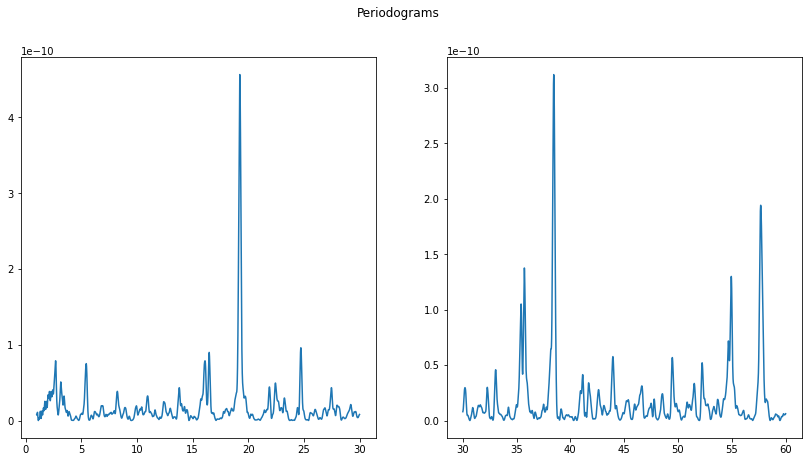

In [41]:
freqs = np.linspace((1/1459.5),(1/0.021), 1000)
lomb = scipy.signal.lombscargle(curve['time'], curve['flux'], freqs, precenter=True)

period1 =np.linspace(1,30,10000)
period2 =np.linspace(30,60,10000)
lomb1 = scipy.signal.lombscargle(freqs, lomb, period1, precenter=True)
lomb2 = scipy.signal.lombscargle(freqs, lomb, period2, precenter=True)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(14)
fig.suptitle('Periodograms')
ax1.plot(period1, lomb1)
ax2.plot(period2, lomb2)

print(period1[np.argmax(lomb1)], period2[np.argmax(lomb2)])

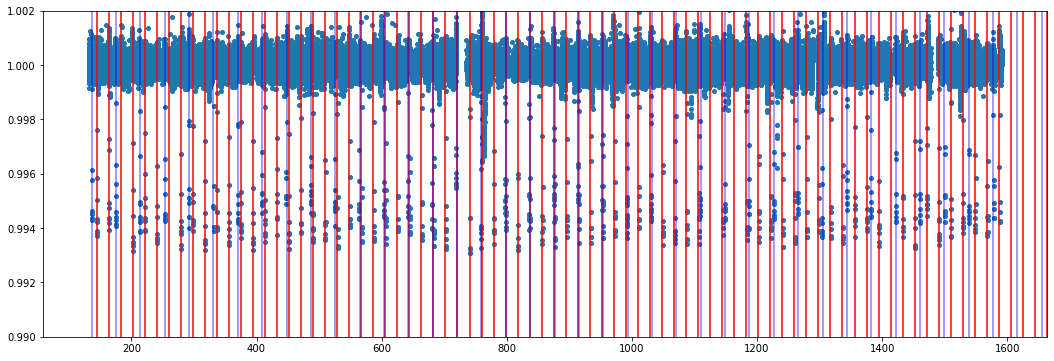

In [9]:
curve = pd.read_csv('normalised_curve', delimiter =',', usecols=[0,1,2], names=['time', 'flux', 'error'])
plt.figure(figsize=(18,6))
plt.plot(curve['time'],curve['flux'], ls='None',marker ='o', markersize=4)
plt.ylim(0.99,1.002)

#expercted periods of planets
actper = 19.23 
actper2 =38.938

#plotting vertical lines where transits should be
#red identifys P~19day planet, blue identifys P~38day planet
for i in range(80):
    plt.axvline((actper*i+144.243013), c='r')
for i in range(40):
    plt.axvline((actper2*i+136.451013), c='b', alpha=0.5)

In [42]:
def para(x,b,c,d,e,f):
    return b*x**4 + c*x**3 + d*x**2 + e*x +f 

def quartic(x,beg,end,depth):
    y=((1-depth)*(2/(end-beg))**4)*(x-(end+beg)*0.5)**4 + depth
    return y

def chisquared(y, error, ymodel):
    return np.sum((y-ymodel)**2/error**2)

def baseline(beg1,end1,beg2,end2):
    basemask1 = (curve['time']>beg1) & (curve['time']<end1)
    basemask2 = (curve['time']>beg2) & (curve['time']<end2)
    baseline = (np.mean(curve['flux'][basemask1])+np.mean(curve['flux'][basemask2]))/2
    return baseline

0.006610998115959776
[6.89584600e-04 6.62196070e-04 7.38113861e-05]


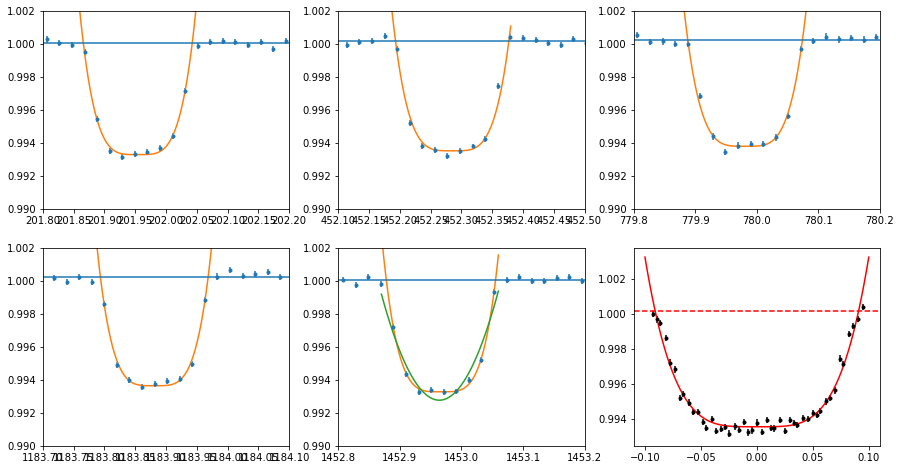

In [38]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1 = fig.add_subplot(2, 3, 1)
xrange191=np.linspace(201.86,202.05,100)
mask191 = (curve['time']>201.86) & (curve['time']<202.05)
popt191, pcov191 = curve_fit(quartic,curve['time'][mask191], curve['flux'][mask191], sigma=curve['error'][mask191],p0=(201.85,202.05,0.007))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(201.8,202.2)
plt.ylim(0.99,1.002)
    
ydata=quartic(xrange191, *popt191)
plt.plot(xrange191,ydata)
base191=baseline(201.8,201.86,202.05,202.2)
plt.axhline(base191)


ax2 = fig.add_subplot(2, 3, 2)
xrange192=np.linspace(452.18,452.38,100)
mask192 = (curve['time']>452.18) & (curve['time']<452.38)
popt192, pcov192 = curve_fit(quartic,curve['time'][mask192], curve['flux'][mask192], sigma=curve['error'][mask192],p0=(452.1,452.4,0.007))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(452.1,452.5)
plt.ylim(0.99,1.002)

ydata=quartic(xrange192, *popt192)
plt.plot(xrange192,ydata)
base192=baseline(452.1,452.18,452.38,452.5)
plt.axhline(base192)


ax3 = fig.add_subplot(2, 3, 3)
xrange193=np.linspace(779.88,780.08,100)
mask193 = (curve['time']>779.88) & (curve['time']<780.08)
popt193, pcov193 = curve_fit(quartic,curve['time'][mask193], curve['flux'][mask193], sigma=curve['error'][mask193],p0=(779.85,780,0.007))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(779.8,780.2)
plt.ylim(0.99,1.002)
    
ydata=quartic(xrange193, *popt193)
plt.plot(xrange193,ydata)
base193=baseline(779.80,779.88,780.08,780.2)
plt.axhline(base193)


ax4 = fig.add_subplot(2, 3, 4)
xrange194=np.linspace(1183.78,1183.98,100)
mask194 = (curve['time']>1183.78) & (curve['time']<1183.98)
popt194, pcov194 = curve_fit(quartic,curve['time'][mask194], curve['flux'][mask194], sigma=curve['error'][mask194],p0=(1183.8,1183.95,0.007))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(1183.7,1184.1)
plt.ylim(0.99,1.002)

ydata=quartic(xrange194, *popt194)
plt.plot(xrange194,ydata)
base194=baseline(1183.7,1183.78,1183.98,1184.1)
plt.axhline(base194)


ax5 = fig.add_subplot(2, 3, 5)
xrange195=np.linspace(1452.87,1453.06,100)
mask195 = (curve['time']>1452.87) & (curve['time']<1453.06)
popt195, pcov195 = curve_fit(quartic,curve['time'][mask195], curve['flux'][mask195], sigma=curve['error'][mask195],p0=(1452.85,1453,0.007))
popt1955, pcov1955 = curve_fit(para,curve['time'][mask195], curve['flux'][mask195], sigma=curve['error'][mask195])

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(1452.8,1453.2)
plt.ylim(0.99,1.002)
    
ydata=quartic(xrange195, *popt195)
plt.plot(xrange195,ydata)
plt.plot(xrange195,para(xrange195,*popt1955))
base195=baseline(1452.8,1452.87,1453.06,1453.2)
plt.axhline(base195)


ax6 = fig.add_subplot(2, 3, 6)
times19=pd.concat([curve['time'][mask191]-(popt191[1]+popt191[0])*0.5,curve['time'][mask192]-(popt192[1]+popt192[0])*0.5,curve['time'][mask193]-\
                (popt193[1]+popt193[0])*0.5,curve['time'][mask194]-(popt194[1]+popt194[0])*0.5,curve['time'][mask195]-(popt195[1]+popt195[0])*0.5])
fluxes19=pd.concat([curve['flux'][mask191],curve['flux'][mask192],curve['flux'][mask193],curve['flux'][mask194],curve['flux'][mask195]])
errors19=pd.concat([curve['error'][mask191],curve['error'][mask192],curve['error'][mask193],curve['error'][mask194],curve['error'][mask195]])

plt.errorbar(times19,fluxes19,errors19,ls='None', markersize=3, color='k', marker='o')
popt19,pcov19 = curve_fit(quartic,times19,fluxes19, sigma=errors19, p0=(-0.1,0.1,0.007))
xrange19= np.linspace(-0.1,0.1,100)
plt.plot(xrange19,quartic(xrange19,*popt19),color='r')

baseline19= np.mean([base191,base192,base193,base194,base195])
plt.axhline(baseline19,ls='--', color='r')

print(baseline19-np.min(quartic(xrange19,*popt19))) #depth of fit
print(np.sqrt(np.diag(pcov19))) #error on transit time beginning, end and depth


0.005655826933487318
[6.89584600e-04 6.62196070e-04 7.38113861e-05]


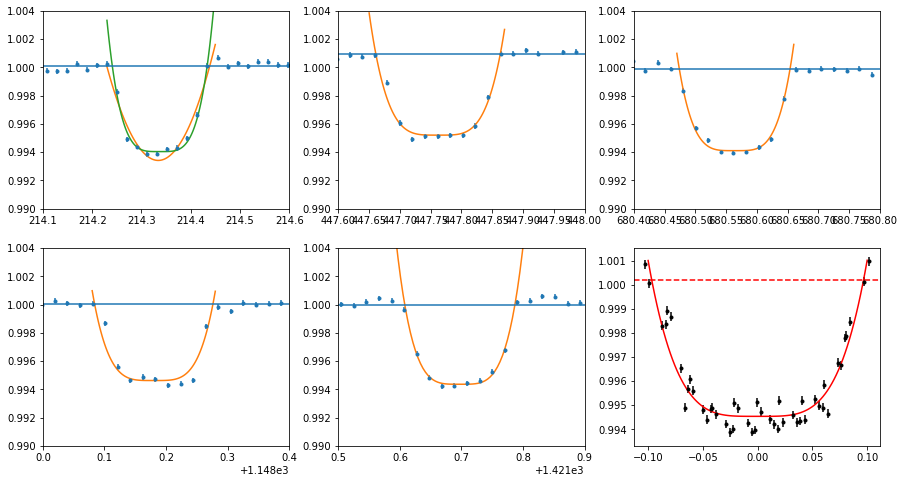

In [40]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1 = fig.add_subplot(2, 3, 1)
xrange381=np.linspace(214.23,214.45,100)
mask381 = (curve['time']>214.23) & (curve['time']<214.45)
popt3811, pcov3811 = curve_fit(para,curve['time'][mask381], curve['flux'][mask381], sigma=curve['error'][mask381])
popt381, pcov381 = curve_fit(quartic,curve['time'][mask381], curve['flux'][mask381], sigma=curve['error'][mask381],p0=(214.2,214.45,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(214.1,214.6)
plt.ylim(0.99,1.004)

plt.plot(xrange381, para(xrange381, *popt3811))
ydata=quartic(xrange381, *popt381)
plt.plot(xrange381,ydata)
base381=baseline(214.1,214.23,214.45,214.6)
plt.axhline(base381)


ax2 = fig.add_subplot(2, 3, 2)
xrange382=np.linspace(447.65,447.87,100)
mask382 = (curve['time']>447.65) & (curve['time']<447.87)
popt382, pcov382 = curve_fit(quartic,curve['time'][mask382], curve['flux'][mask382], sigma=curve['error'][mask382],p0=(447.65,447.85,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(447.6,448)
plt.ylim(0.99,1.004)
    
ydata=quartic(xrange382, *popt382)
plt.plot(xrange382,ydata)
base382=baseline(447.6,447.65,447.87,448)
plt.axhline(base382)


ax3 = fig.add_subplot(2, 3, 3)
xrange383=np.linspace(680.47,680.66,100)
mask383 = (curve['time']>680.47) & (curve['time']<680.66)
popt383, pcov383 = curve_fit(quartic,curve['time'][mask383], curve['flux'][mask383], sigma=curve['error'][mask383],p0=(680.4,680.6,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(680.4,680.8)
plt.ylim(0.99,1.004)

ydata=quartic(xrange383, *popt383)
plt.plot(xrange383,ydata)
base383=baseline(680.4,680.47,680.66,680.8)
plt.axhline(base383)


ax4 = fig.add_subplot(2, 3, 4)
xrange384=np.linspace(1148.08,1148.28,100)
mask384 = (curve['time']>1148.08) & (curve['time']<1148.28)
popt384, pcov384 = curve_fit(quartic,curve['time'][mask384], curve['flux'][mask384], sigma=curve['error'][mask384],p0=(1148.08,1148.27,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(1148,1148.4)
plt.ylim(0.99,1.004)
    
ydata=quartic(xrange384, *popt384)
plt.plot(xrange384,ydata)
base384=baseline(1148,1148.1,1148.27,1148.4)
plt.axhline(base384)


ax5 = fig.add_subplot(2, 3, 5)
xrange385=np.linspace(1421.5,1421.9,100)
mask385 = (curve['time']> 1421.62 ) & (curve['time'] < 1421.78)
popt385, pcov385 = curve_fit(quartic,curve['time'][mask385], curve['flux'][mask385], sigma=curve['error'][mask385],p0=(1421.6,1421.8,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(1421.5,1421.9)
plt.ylim(0.99,1.004)

ydata=quartic(xrange385, *popt385)
plt.plot(xrange385,ydata)
base385=baseline(1421.5,1421.6,1421.77,1421.9)
plt.axhline(base385)


ax6 = fig.add_subplot(2, 3, 6)
times38=pd.concat([curve['time'][mask381]-(popt381[1]+popt381[0])*0.5,curve['time'][mask382]-(popt382[1]+popt382[0])*0.5,curve['time'][mask383]-\
                (popt383[1]+popt383[0])*0.5,curve['time'][mask384]-(popt384[1]+popt384[0])*0.5,curve['time'][mask385]-(popt385[1]+popt385[0])*0.5])
fluxes38=pd.concat([curve['flux'][mask381],curve['flux'][mask382],curve['flux'][mask383],curve['flux'][mask384],curve['flux'][mask385]])
errors38=pd.concat([curve['error'][mask381],curve['error'][mask382],curve['error'][mask383],curve['error'][mask384],curve['error'][mask385]])

plt.errorbar(times38,fluxes38,errors38,ls='None', markersize=3, marker='o',color='k')
popt38,pcov38 = curve_fit(quartic,times38,fluxes38, sigma=errors38, p0=(-0.1,0.1,0.006))
xrange38= np.linspace(-0.1,0.1,100)
plt.plot(xrange38,quartic(xrange38,*popt38),color='r')

baseline38= np.mean([base381,base382,base383,base384,base385])
plt.axhline(baseline38,ls='--', color='r')

print(baseline38-np.min(quartic(xrange38,*popt38)))
print(np.sqrt(np.diag(pcov19)))

### 3. Discussion

$\bullet$ present comparison of your results with data, including statistical analyis and clear figures. -(compare to known values,selection effects, describe TTV mass constraints and whether agree?) 

$\bullet$ limit yourself in the presentation of results, focus on fewer results that are described well, rather than presenting many figures without clear context

$\bullet$ Include a short (~ 200 word) description of a follow-up observations that would address an open question in your report. -(how to improve TTV measurements?)


<div class="alert alert-block alert-danger">
<b>Word limit: 2000 words</b>

### 4. Summary

$\bullet$ summarize your results. This can be done in text or bullet points.

<div class="alert alert-block alert-danger">
<b>Word limit: 300 words</b>

### References:

Give all references here. Use Astronomy style references, e.g.
- Miller & Jones, 2018, ApJ, 00, 000 (yr, journal,vol,pg)
- Smith et al. 2019, MNRAS, 00, 000
- Willow 1972, AJ, 00, 000

And cite these in the text as "Miller & Jones (2018) showed that all exoplanets are made of cheese, however, Smith et al. (2019) showed Trappist1b is made of chocolate, as previously suggested in the literature (Willow 1972)." 


### Acknowledgments

Acknowlegde the use of any software or datasets here.